# Table of contents

[Supervised - basic models](./supervised_basic.ipynb)

[Supervised - RNN models](./supervised_rnn.ipynb)

[Unsupervised - Word2Vec](./unsupervised_w2v.ipynb)

[Unsupervised - Dimensionality Reduction](./unsupervised_dim.ipynb)

[Unsupervised - LDA](./unsupervised_LDA.ipynb)

[Performance Evaluation](./evaluation.ipynb)

In [31]:
import numpy as np
import pandas as pd

import re
import random

from collections import Counter, defaultdict

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

# from tqdm import tqdm
import pickle

import time


from sklearn.pipeline import Pipeline


from nltk.corpus import stopwords

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

from preprocess_helper import preprocess_helper
from evaluation_helper import evaluation_helper

In [32]:
RANDOM_SEED=42

In [3]:
preprocessor = preprocess_helper('data/WikiLarge_Train.csv')
train_df = preprocessor.get_df()

X = train_df["original_text"]
y = train_df["label"]
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X, y)

<class 'pandas.core.series.Series'>


Cluster id labels for inputted data
[1 1 1 ... 1 1 0]
Centroids data
[[-1.21358360e-01  8.51278811e-03 -1.76258027e-04  2.38231299e-01
   2.61635941e-01 -1.88670729e-01 -1.34309248e-01 -3.47418473e-01
  -3.69661768e-01  8.59342407e-02 -4.76040002e-01 -3.74641429e-01
  -2.82825796e-01 -1.08288925e+00  3.64256834e-01 -6.28776651e-01
   5.23001727e-02 -7.19896903e-01 -1.87637057e-01 -6.65952180e-02
  -3.78557208e-01 -4.51300631e-01 -9.28321551e-01  4.05270762e-01
  -7.54733462e-01  2.84016356e-01 -4.67195918e-01  2.77259284e-01
  -1.14142460e-01 -3.96725212e-01 -3.10183147e-01 -1.39323527e-01
  -1.59802664e-01 -2.82624072e-01 -3.61881014e-01 -7.01072960e-01
   1.11348291e-01  3.20332904e-01  3.94098361e-01  4.17396815e-01
  -2.55930768e-02 -2.32906443e-01 -1.65113189e-03  3.69265319e-01
  -3.86764151e-01 -1.81050654e-01  4.16233537e-01  2.82529560e-01
  -3.92656505e-01 -4.62361891e-02 -1.30270912e-01 -7.49573358e-02
  -6.87565324e-01 -1.69946673e-01 -2.20781956e-01 -2.19879910e-01
  -2.64

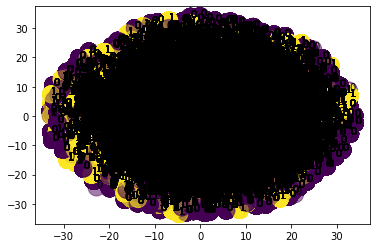

In [5]:
# https://ai.intelligentonlinetools.com/ml/text-clustering-word-embedding-machine-learning/
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

sentences = [t.split(" ") for t in train_df["original_text"]
model = Word2Vec(sentences, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")

# note with some version you would need use this (without wv) 
#  model[model.vocab] 

NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
  
  
  
# for index, sentence in enumerate(sentences):    
#     print (str(assigned_clusters[index]) + ":" + str(sentence))
 
start_time = time.time()
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
kmeans_time = time.time() - start_time

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
start_time = time.time()
Y=model.fit_transform(X)
tsne_time = time.time() - start_time
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
 
 
plt.show()

In [7]:
evaluator = evaluation_helper()
evaluator.evaluate("KMeans_w2v", y, kmeans.labels_, kmeans_time)


Completed in 7.81s
confusion matrix: 
 [[ 54312 154072]
 [ 41056 167328]] 

f1=  0.6316838560620932 ; accuracy=  0.5318066646191646 ; precision=  0.5206222775357809 ; recall=  0.8029791154791155
roc_auc=  0.5318066646191647


(0.6316838560620932,
 0.5318066646191646,
 0.5206222775357809,
 0.8029791154791155,
 0.5318066646191647)

In [9]:


 
sentences = [t.split(" ") for t in train_df["original_text"]]
model = Word2Vec(sentences, min_count=1)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))


In [10]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def get_params(self, deep=False):
        return {"word2vec": self.word2vec}
    
    def set_params(self):
        return self

In [24]:
transformer = ColumnTransformer(
    [
        ('tfidf', TfidfVectorizer(max_df=0.6, min_df=50, ngram_range=(1,4), stop_words=None, lowercase=False), "original_text"),
        ('w2v', MeanEmbeddingVectorizer(w2v), "split_text")
    ], remainder='passthrough'
)

In [25]:

from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", transformer),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [26]:

X = train_df[["original_text"]]
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X, y)
X_train["split_text"] = X_train["original_text"].apply(lambda text: text.split(" "))
X_test["split_text"] = X_test["original_text"].apply(lambda text: text.split(" "))


X_train


<class 'pandas.core.frame.DataFrame'>


,original_text,split_text
304501,1979-80 Buffalo Sabres NHL 32 1880 74 1 4 2.36...,"[1979-80, Buffalo, Sabres, NHL, 32, 1880, 74, ..."
162313,Diseases Lentils in culture Lentils are mentio...,"[Diseases, Lentils, in, culture, Lentils, are,..."
336845,"Railroads , like the Lehigh Valley Railroad , ...","[Railroads, ,, like, the, Lehigh, Valley, Rail..."
150625,An example of this would be an individual anim...,"[An, example, of, this, would, be, an, individ..."
40240,Both the Matanuska and Susitna Rivers have maj...,"[Both, the, Matanuska, and, Susitna, Rivers, h..."
...,...,...
259178,After the Germans invaded Norway in April 1940...,"[After, the, Germans, invaded, Norway, in, Apr..."
365838,"July 28 - Henry Bennet , 1st Earl of Arlington...","[July, 28, -, Henry, Bennet, ,, 1st, Earl, of,..."
131932,Pancake restaurants are popular family restaur...,"[Pancake, restaurants, are, popular, family, r..."
146867,A cycling domestique,"[A, cycling, domestique]"


In [27]:
start_time = time.time()
etree_w2v.fit(X_train, y_train)
y_pred = etree_w2v.predict(X_test)
total_time = time.time() - start_time

In [29]:

evaluator.evaluate("ExtraTrees_w2v", y_test, y_pred, total_time)

Completed in 19722.83s
confusion matrix: 
 [[29198 12351]
 [12202 29603]] 

f1=  0.7068613522128966 ; accuracy=  0.7054370516112004 ; precision=  0.7056061400581589 ; recall=  0.7081210381533309
roc_auc=  0.7054287830541379


(0.7068613522128966,
 0.7054370516112004,
 0.7056061400581589,
 0.7081210381533309,
 0.7054287830541379)

In [35]:

lr_w2v = Pipeline([
    ("word2vec vectorizer", transformer),
    ("classifier",  LogisticRegression(random_state=RANDOM_SEED, max_iter=10000, penalty='l2', solver='sag'))])

In [36]:
start_time = time.time()
lr_w2v.fit(X_train, y_train)
y_pred = lr_w2v.predict(X_test)
total_time = time.time() - start_time
evaluator.evaluate("LogisticRegression_w2v", y_test, y_pred, total_time)

Completed in 333.80s
confusion matrix: 
 [[29259 12290]
 [11383 30422]] 

f1=  0.7199025048215152 ; accuracy=  0.7159944333805216 ; precision=  0.7122588499719048 ; recall=  0.7277119961727067
roc_auc=  0.7159583350860405


(0.7199025048215152,
 0.7159944333805216,
 0.7122588499719048,
 0.7277119961727067,
 0.7159583350860405)